## Model Acheived validation accuracy : 84.55% (Max: 85.24%) in 75 epochs

## Importing Keras Libraries and Modules


In [1]:
from keras import backend as K
import numpy as np
import time
# Importing matplot library
import matplotlib.pyplot as plt
% matplotlib inline
# Seed the generator
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


##Importing Cifar10 dataset

In [2]:
# Importing Cifar10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 31s 0us/step


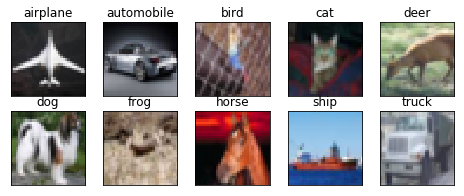

In [3]:
# Ploting each class from cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot model history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to define accuracy
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [60]:
# Define the model
model = Sequential()

model.add(Convolution2D(48, 3, 3, activation='relu', border_mode='same', input_shape=(32, 32, 3))) #32
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(48, 3, 3, activation='relu')) #30
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) #15


model.add(Convolution2D(96, 3, 3, activation='relu', border_mode='same')) # 15
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, activation='relu')) # 13
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(MaxPooling2D(pool_size=(2, 2))) #5


model.add(Convolution2D(192, 3, 3, activation='relu', border_mode='same')) #5
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, activation='relu')) # 5
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, activation='relu')) # 3
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1)) #1

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="

In [61]:
# Summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_225 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_246 (Dropout)        (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_247 (Dropout)        (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 15, 15, 48)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=75)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/75
390/390 [==============================] - 20s 51ms/step - loss: 1.6102 - acc: 0.4368 - val_loss: 1.9347 - val_acc: 0.4297
Epoch 2/75
390/390 [==============================] - 17s 43ms/step - loss: 1.0931 - acc: 0.6154 - val_loss: 1.1272 - val_acc: 0.6211
Epoch 3/75
390/390 [==============================] - 17s 43ms/step - loss: 0.8697 - acc: 0.6959 - val_loss: 1.1606 - val_acc: 0.6282
Epoch 4/75
390/390 [==============================] - 17s 43ms/step - loss: 0.7407 - acc: 0.7400 - val_loss: 0.9404 - val_acc: 0.6959
Epoch 5/75
390/390 [==============================] - 17s 43ms/step - loss: 0.6634 - acc: 0.7673 - val_loss: 0.8211 - val_acc: 0.7373
Epoch 6/75
390/390 [==============================] - 17s 43ms/step - loss: 0.6060 - acc: 0.7889 - val_loss: 0.7868 - val_acc: 0.7442
Epoch 7/75
390/390 [==============================] - 17s 43ms/step - loss: 0.5483 - acc: 0.8098 - val_loss: 0.8067 - val_acc: 0.7467
Epoch 8/75
390/390 [==============================] - 17s 43ms

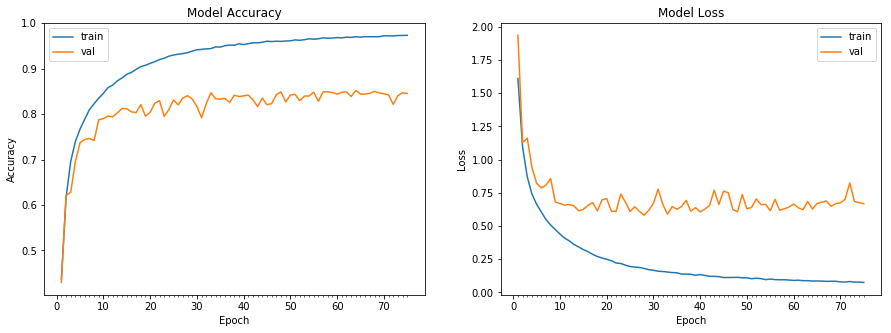

Accuracy on test data is: 84.55


In [62]:
# Image Normalization
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 75, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))